

# <font color='darkblue'>Project: Investigating the No-show Medical Appointment Dataset</font>

## <font color='darkblue'>Table of Contents </font>
<ul>
<li><a href="#intro">1. Introduction</a></li>
<li><a href="#wrangling">2. Data Wrangling</a></li>
<li><a href="#eda">3. Exploratory Data Analysis</a></li>
<li><a href="#conclusions">4.Visualization and Conclusions</a></li>
</ul>

 <a id='intro'></a>
## <font color='darkblue'> 1. Introduction</font>

>In this project, we are going to analyse dataset, that contain information on 100k medical appointments on patients that honoured their appointments and those that did not. The dataset comprises 110527 medical appointments with associated variables as shown below.

>**PatientId**: Identification of a patient.

>**AppointmentID**: Identification of each appointment.

>**Gender**: Male or Female

>**ScheduledDay**: The day someone called or registered the appointment.

>**AppointmentDay**: The day of the actual appointment, when they have to visit the doctor.

>**Age**: How old is the patient.

>**Neighbourhood**: Where the appointment takes place.

>**Scholarship**: True or False

>**Hipertension**: True or False

>**Diabetes**:True or False

>**Alcoholism**:True or False

>**Handcap**:True or False

>**SMS_received**: 1 or more messages sent to the patient.

>**No-show**: True or False

> *Note: 1 = True and 0 = False*

> As we can see, there are 14 variables in total. Based on these variables, the proposed research questions are set and can be read. 


> ## <font color='darkblue'>Research Questions</font>

> - #### Which weekday draws highest patients's traffic?
> - #### What is average wating time for patients that honoured their appointments as compared those that did not?
> - #### What is average waiting time for each gender that appeard at medical appointment?
> - #### What pattern distribution exists among patients that have shorter average waiting time?
> - #### Do patients in scholarship schemes turn to have comparatively shorter waiting time as compaed to those not in the scheme?


<a  id='wrangling'></a>
## <font color='darkblue'>2. Data Wrangling</font>


> Now that the research questions have been set, we begin with the data wrangling.

> ### <font color='darkblue'> General Data Properties</font>

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sms
%matplotlib inline

# load datasets
df = pd.read_csv('noshowappointments.txt', sep=(','))

In [2]:
#Data is loaded and the first five information is displayed
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Display more detailed information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


> Taking a closer look at the dataset, luckily, we have no missing and duplicated values. However, some columns names are misspelt. Furthermore, names are both in upper and lower case, which can take time to type. In addition, ScheduledDay and AppointmentDay should be datetime instead of string. Lastly, values of No-show will to be changed to numeric for easier function call. Given the identified dataset structure problems, following steps will be required to have it cleaned: 
> - *Some column names renaming*
> - *Lowercase for all column names*
> - *ScheduledDay and AppointmentDay datatypes to datetime* 
> - *No-show values to numeric*
> - *Drop some columns*


In [4]:
#Description of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

> The summary statistics above shows that 50% of patients are younger than 37 and the other 50% are older than 37. However, we can see that age has a minimum value of -1. Furthermore, Handcap has a maximum value of 4, But it is expected that its value to be 0 or 1 to indicate whether the patient is physically challenged or not. We take a closer look at Age and Handcap columns.

In [6]:
# Number of patients with age -1
df.query('Age == -1').Age.count


<bound method Series.count of 99832   -1
Name: Age, dtype: int64>

In [7]:
# Check unique values of Handcap
df.Handcap.unique()


array([0, 1, 2, 3, 4], dtype=int64)

In [8]:
# Check Handcap values and number of patients for each variables.
hancap = df.Handcap.value_counts()
hancap

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [9]:
# Percentage total of Handcap values of 2, 3 and 4.
handcap_percent = ((hancap[2:5].sum(axis =0))/df.Handcap.count())*100
handcap_percent

0.18004650447401993

> The information above confirms that only one row had an Age value of -1. I am of the view that, this negative value might be typo for a patient child that is 1 year old, if not a typo and assume it represents a baby that is not yet born, it would be given an age value of 0. Next, considering Handcap unique values, we see that they range from 0, 1, 2, 3 and 4 and percentage total of Handcap values (2, 3 and 4) is 0.18%, which is less than 1%. For further analysis though, decision is made to drop rows with Age = -1 as well as Handcap values containing 2, 3 and 4. In my opinion, elimination of this variables might bring some consistency in the dataset description.



>## <font color='darkblue'> Data Cleaning </font>

> ### <font color='darkblue'>Some column names renaming and Lowercase for all column names</font>

>We begin the data cleaning with renaming some of the column’s values. As we have seen column names: PatientId, AppointmentID, ScheduledDay, AppointmentDay and No-show are renamed as patient_id, appointment_id, scheduled_day, appointment_day and no_show respectively to ensure easier function call and identification. Inaddition, Hipertension and Handcap need to be changed to hypertension as well as handicap accordingly. This cleaning is done in two steps as provided below.


In [10]:
# Renaming of columns PatientId, ScheduledDay, AppointmentID, Hipertension, Handcap and No-show
df.rename(columns={'PatientId':'patient id','AppointmentID':'appointment id','ScheduledDay':'scheduled day','AppointmentDay':'appointment day','Hipertension':'hypertension','Handcap':'handicap','No-show':'no show'}, inplace=True)


In [11]:
# Chnanging all column names to lower-case
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [12]:
# Confirming the change
df.head(3)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


> Displayed information above confirms implementation of the changes accordingly. Next, we consider datatypes for ScheduledDay and AppointmentDay. Please note henceforth, new names for the variables will be used in the remaining of analysis.

> ### <font color='darkblue'>ScheduledDay and AppointmentDay datatypes to datetime</font>

In [13]:
#change the data type of appointment_id and scheduled_day to datetime type
df['appointment_day'] = pd.to_datetime(df.appointment_day)
df['scheduled_day']= pd.to_datetime(df.scheduled_day)

> Datatypes of both appointment_id and scheduled_day are now datetime. This transformation will help in categorising their variables into days, weeks and months.Changing of no_show values to numeric value follows next.

> ### <font color='darkblue'>No-show values to numeric with No = 1 and Yes = 0 </font>

In [14]:
# changing no_show value to numeric
df['no_show'] = (df['no_show']=='No').astype(int) 

In [15]:
#Confirm change
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1


> Continuing further now to remove both age = -1 row and  handicap values of 2, 3, 4.

> ### <font color='darkblue'>Remove age = -1 row and that of handicap values of 2, 3, 4  </font>

In [16]:
# Remove index of age with age = -1
age_neg = df.query('age ==-1').index.values

#Drop the
df.drop(age_neg, inplace=True)



In [17]:
# Remove multiple rows where handicap values are 2, 3 and 4
hand_out = df.query('handicap == 2 | handicap == 3 | handicap == 4').handicap.index

# Drop affected values from 
df.drop(hand_out, inplace=True)


In [18]:
# Confirm the change
df.handicap.unique()

array([0, 1], dtype=int64)

> we have age = -1 and unwanted values of handicap variables removed. Our final cleaning will be on droping patient_id and appointment_id. The variable neighbourhood, a category variable will not be consider.   

In [19]:
df.drop(['patient_id', 'appointment_id'], axis= 1, inplace=True)

In [20]:
#Confirm droping patient_id and appointment_id
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000,110327.000000
mean,37.070753,0.098281,0.196833,0.071605,0.030382,0.018509,0.321182,0.798073
std,23.098052,0.297695,0.397607,0.257834,0.171638,0.134782,0.466932,0.401440
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


So,we have now finished with dataset wrangling, we will explore the dataset next.

<a id='eda'></a>
## <font color='darkblue'>3. Exploratory Data Analysis</font>





> ### <font color='darkblue'> Which weekday attracts most patients' traffic?</font>


> To begin our analysis, we have appointment_day variables as dates divided into days of the week (Monday, Tuesday, Wednesday, Thursday, Friday, Saturday and Sunday). Using Pandas datetime reference we will reference Monday = 0, Tuesday = 1, Wednesday =0,.., Sunday = 6. Thus, we perform replace mapping. Then we will compute the number of patients for each day and their corresponding percentages.

In [21]:
# Total number of patients each day that honored their appointment
present = df.query('no_show == 1').appointment_day
day_present = present.dt.dayofweek.value_counts()
day_present


2    20740
1    20448
0    17997
4    14952
3    13882
5       30
Name: appointment_day, dtype: int64

In [22]:
#Total number of patients honored appointment
day_present.sum()

88049

> We have seen that a total number of 88049 patients honoured their appointments by using information on days of the week. To get a clear picture of proportion of distribution, we proceed by following percentage calculation and then obtain the overall total. Hence, we have:

In [23]:
# Calculate precentage per day
monday = (day_present[0]/day_present.sum())*100
tuesday = (day_present[1]/day_present.sum())*100
wednesday = (day_present[2]/day_present.sum())*100
thursday = (day_present[3]/day_present.sum())*100
friday = (day_present[4]/day_present.sum())*100
saturday = (day_present[5]/day_present.sum())*100


In [24]:
#total precentage 
total_percent = monday + tuesday + wednesday + thursday + friday + saturday

> We will now create a dataframe to display above information in table form.

In [25]:
# Construct a dataframe to display information on a table

present_total = [day_present[0], day_present[1], day_present[2], day_present[3], day_present[4], day_present[5], day_present.sum()]
#present_total=day_present[],day_present.sum()
day_percent = [monday.round(2), tuesday.round(2), wednesday.round(2), thursday.round(2), friday.round(2), saturday.round(2), total_percent.round()]

val ={'Each day total': present_total, 'Each day percentage': day_percent}

index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday','Total']

column = ["Each day total", "Each day percentage"]

tab = pd.DataFrame(val, index=index, columns=column)

tab

,Each day total,Each day percentage
Monday,17997,20.44
Tuesday,20448,23.22
Wednesday,20740,23.56
Thursday,13882,15.77
Friday,14952,16.98
Saturday,30,0.03
Total,88049,100.00


> We can read from the table that most traffic of patients occurred on Wednesday, matching percent value of 23.56%, amounting to 20740 patients’ numbers. Saturday saw lowest traffic clocking just 0.03%. With this information at hand, we move on to the second research analysis.

> ### <font color='darkblue'> What is average wating time for patients that honoured their appointments as compared with those that did not?</font>

> Here, we are interested in knowing average waiting time for patients that honoured appointments and those that did not. In order to have it calculated, we will first get scheduled and appointment days for patients that were present and those that did not. 

> Therefore, we will query the dataframe to get scheduled days and appointment days for those patients that showed up and those that did not. Finally, average waiting time will be calculated for each patient.


In [26]:
#Create query dataframe for pateints that honored appointment
present = df.query('no_show == 1')
#appointment_day
appiont_time = present.appointment_day 
# scheduled day
sched_time = present.scheduled_day 


In [27]:
# Difference between appointment days and scheduled days for each of those appointment honored patients using dt.days function. 
wait_time = (appiont_time - sched_time).dt.days
wait_time

0         -1
1         -1
2         -1
3         -1
4         -1
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Length: 88049, dtype: int64

> Some obtained results from above are negative. Ideally, scheduled day date should be before the appointment day and thus, avoid the expectation of negative values. I consider classifying it as an error, which cannot be explained now. To be at a safer side, absolute values of them are used to proceed with the analysis. 


In [28]:
#Waiting time for those that appiontment honored group
abs_wait_time = wait_time.abs()
abs_wait_time

0          1
1          1
2          1
3          1
4          1
          ..
110522    34
110523    34
110524    40
110525    40
110526    40
Length: 88049, dtype: int64

In [29]:
abs_wait_time.mean()

8.592545060136969

In [30]:
# Describing the patients that showed up
abs_wait_time.describe()


count    88049.000000
mean         8.592545
std         14.080150
min          0.000000
25%          1.000000
50%          1.000000
75%         11.000000
max        178.000000
dtype: float64

> The same procedure is followed to obtain average waiting time for patients that failed to attend to their appointments. We will not document all the steps here. 

In [31]:
# Create query dataframe for pateints that did not honor appointments
absent = df.query('no_show == 0')
#appointment_day
appiont_time = absent.appointment_day 
# scheduled day
sched_time = absent.scheduled_day  

In [32]:
wait_time = (appiont_time - sched_time).dt.days

In [33]:
abs_await_time = wait_time.abs()


In [34]:
abs_await_time.mean()

14.992638477421671

In [35]:
abs_await_time.describe()

count    22278.000000
mean        14.992638
std         16.454749
min          0.000000
25%          3.000000
50%         10.000000
75%         22.000000
max        178.000000
dtype: float64

> The above results show that average waiting days of patients that honoured their appointment is 9 days while those that failed to attend is 15 days. In addition, the median day for those that showed up is just day, while for those that did not is 10 days, and interesting observation. In conclusion, it seems there seems to be some association between shorter waiting days and honouring appointment. The next research questions follow soon.

> ### <font color='darkblue'> What is average waiting time for each gender that appeard at medical appointment?</font>


> Now we find average waiting for each genders that honored their appoints. We have already constructed a query for this group in the last chapter represented by "present". On this we queried to get male and female gender and assigned to different variable. So, we get query for females as shown below..


In [36]:
#query for female patients
female_time = present.query('gender== "F"')
female_time.head()


,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,1
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,1
5,F,2016-04-27 08:36:51+00:00,2016-04-29 00:00:00+00:00,76,REPÚBLICA,0,1,0,0,0,0,1


> Next we get differnce between the appointment day and scheduled day and then we obtain the result below. The same procedure is in finding that for male patients.

In [37]:
# Difference between appointment day and scheduled day
time_female_waiting = (female_time['appointment_day'] - female_time['scheduled_day']).dt.days.abs()
time_female_waiting.describe()


count    57162.000000
mean         8.896662
std         14.393519
min          0.000000
25%          1.000000
50%          1.000000
75%         12.000000
max        178.000000
dtype: float64

In [38]:
#Query for male patients
time_male = present.query('gender=="M"')
time_male.head()


,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,1
13,M,2016-04-28 14:52:07+00:00,2016-04-29 00:00:00+00:00,28,NOVA PALESTINA,0,0,0,0,0,0,1
16,M,2016-04-28 08:51:47+00:00,2016-04-29 00:00:00+00:00,50,NOVA PALESTINA,0,0,0,0,0,0,1
25,M,2016-04-26 15:04:17+00:00,2016-04-29 00:00:00+00:00,46,CONQUISTA,0,1,0,0,0,1,1
28,M,2016-04-29 15:48:02+00:00,2016-04-29 00:00:00+00:00,51,SÃO PEDRO,0,0,0,0,0,0,1


In [39]:
#
time_male_waiting = (time_male['appointment_day'] - time_male['scheduled_day']).dt.days.abs()
time_male_waiting.describe()


count    30887.000000
mean         8.029721
std         13.463120
min          0.000000
25%          1.000000
50%          1.000000
75%          9.000000
max        178.000000
dtype: float64

> Considering results from above analysis, male patients wait on average one day lesser then female patients, with an average waiting of 8 days. Female have 9 days. This result is also reflected in their standard deviations, with males waiting time slightly smaller. Despite this, we see that in third quartile waiting time for men is much smaller than that of the female. This is a difference of 3 days. Based on this analysis, it seems that on average men have shorter waiting days.



> ### <font color='darkblue'> What pattern distribution exists among patients that have shorter average waiting time?</font>



> We have found that patients that honour their appointments generally have on average shorter waiting time. This known, we will like to know how they are distributed along their age structure. As orientation for building of age structure, we will use Brazil Age structure that has this intervals children(0 - 14 years), early working age(15 - 24 years), prime working age(25 - 54 years), mature working age(55 - 64 years),and elderly(65 and more). We will bin the ages into 0, 15, 25, 55, 65, 116. The result is show below.

In [40]:
# Construct bin for population structure
age_interval = pd.cut(present['age'], bins=[0, 15, 25, 55, 65, 116], labels=['Children <0-14>','Early <15-24>','Prime <25-54>','Mature <55-64>','Elderly <65+>'],include_lowest=
True)
age_interval.value_counts()


Prime <25-54>      35173
Children <0-14>    19195
Mature <55-64>     11949
Elderly <65+>      11194
Early <15-24>      10538
Name: age, dtype: int64

In [41]:
# count values
col = age_interval.value_counts()

# Calculate precentage values
children = ((col["Children <0-14>"]/col.sum())*100).round(2)
early = ((col["Early <15-24>"]/col.sum())*100).round(2)
prime = ((col["Prime <25-54>"]/col.sum())*100).round(2)
mature = ((col["Mature <55-64>"]/col.sum())*100).round(2)
elderly = ((col["Elderly <65+>"]/col.sum())*100).round(2)


In [42]:
# Construct table to show information
index = ['Children <0-14>','Early <15-24>','Prime <25-54>','Mature <55-64>','Elderly <65+>']
table = pd.DataFrame({"Number of patients":[col["Children <0-14>"], col["Early <15-24>"], col["Prime <25-54>"], col["Mature <55-64>"], col["Elderly <65+>"]], "Percentage":[children, early, prime, mature, elderly]}, index=index)
table

,Number of patients,Percentage
Children <0-14>,19195,21.80
Early <15-24>,10538,11.97
Prime <25-54>,35173,39.95
Mature <55-64>,11949,13.57
Elderly <65+>,11194,12.71


> We can see from displayed distribution that prime group (25-54), with 40%, have the most patients that honored their appointments. Finally the last research question is follows.


> ### <font color='darkblue'> Do patients in scholarship schemes turn to have comparatively shorter waiting time than those not in the scheme?</font>

> The result of the last research question is derived using two approaches, that lead to same results. The first approach calculates the proportions mannually and the second approach using panda Groupby method. 

> As a recarp, dataset is queried into two groups namely "present" for those who showed up and "absent", for those who failed to show up. The steps below are used to obtain results for analysis.

In [43]:
#patients that honor their appointment and have scholarship
pre_scholar = present.query('scholarship == 1').scholarship.count()

In [44]:
#patients that honor their appointment and but have no scholarship
pre_no_scholar = present.query('scholarship == 0').scholarship.count()


In [45]:
#patients that did not honor their appointment and but have scholarship
ab_scholar = absent.query('scholarship == 1').scholarship.count()


In [46]:
#patients that did not honor their appointment and have no scholarship
ab_no_scholar = absent.query('scholarship == 0').scholarship.count()


In [47]:
# proportion of patients that have scholarship and showed up
pro_pre_scholar = (pre_scholar/(pre_scholar + pre_no_scholar)).round(2)



In [48]:
# proportion of patients that have no scholarship and showed up
pro_pre_no_scholar = (pre_no_scholar /(pre_scholar + pre_no_scholar)).round(2)


In [49]:
# proportion of patients that have scholarship and did not showed up
pro_ab_scholar = (ab_scholar/(ab_scholar + ab_no_scholar)).round(2)


In [50]:
# proportion of patients that do not have scholarship and die showed up
pro_ab_no_scholar = (ab_no_scholar/(ab_scholar + ab_no_scholar)).round(2)


In [51]:
# Table showing the percentage of that are in the scholarship and not receive for patients that showed up and did not show up.
tab_scholarship = pd.DataFrame({"Scholarship":['YES','NO'], "Honor_Appointment":[pro_pre_scholar, pro_pre_no_scholar], "Not_Honor_Appointment":[pro_ab_scholar, pro_ab_no_scholar]})
tab_scholarship

,Scholarship,Honor_Appointment,Not_Honor_Appointment
0,YES,0.09,0.12
1,NO,0.91,0.88


> The table depicts patients for both groups. As we can see, average 9% of the patients that honoured their appointment come from the scholarship group and the rest of 91% have no scholarship. On the other hand, 12% of those in scholarship scheme failed to show up as against 88% of those not in the scholarship scheme. Based on this analysis, we may say that more patient in scholarship comparatively have longer wating days as those not in the scheme.

> Now obtain results above using groupby method follows. Here just for the purpose of fulfilment of the project requiement.

In [52]:
#Calculate total patients honored the appointment without scholarships
present.scholarship.value_counts()

0    79783
1     8266
Name: scholarship, dtype: int64

In [53]:
##Calculate total patients that did not honor their appointment with or without scholarships
absent.scholarship.value_counts()

0    19701
1     2577
Name: scholarship, dtype: int64

In [54]:
#proportion of patients that have scholarship and turn up on average
present.scholarship.mean()

0.09387954434462628

In [55]:
#proportion of patients that have scholarship and did not turn up on average
absent.scholarship.mean()

0.11567465661190413

In [56]:
# Showing a more detailed information 
present.groupby('scholarship').mean()

,age,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
scholarship,,,,,,,
0,38.480867,0.206272,0.075618,0.028803,0.01934,0.292581,1
1,30.984273,0.182797,0.053835,0.045850,0.01609,0.280305,1


In [57]:
absent.groupby('scholarship').mean()

,age,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
scholarship,,,,,,,
0,34.907416,0.171362,0.065936,0.026699,0.017207,0.436069,0
1,29.475747,0.144354,0.047730,0.057819,0.010477,0.459449,0


<a id='conclusions'></a>
## <font color='darkblue'>4. Visualization and Conclusions</font>

> ### <font color='darkblue'> Which weekday attracts most patients' traffic?</font>

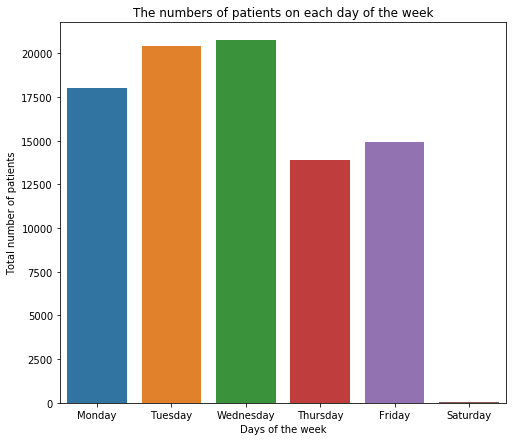

In [58]:
#A Display the number of patients that showed up in each day of the week using a bar graph
# Using Matplotlib

plt.figure(figsize=(8,7))
sms.barplot(data=tab.reset_index(), x=tab.index[:-1], y=tab['Each day total'][:-1])
plt.xlabel('Days of the week')
plt.ylabel('Total number of patients')
plt.title('The numbers of patients on each day of the week')
plt.show()


> As we can see, the chart shows that Wednesday attracts more patients than the other days. Saturday has the least patient number.


> ### <font color='darkblue'> What is average wating time for patients that honoured their appointments as compared with those that did not?</font>

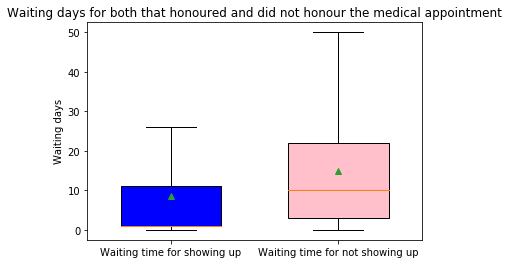

In [59]:
#Boxplot is used to show the information for both waiting time.
# The waiting time values for each category is placed in a list as waiting days.

waiting_days = [abs_wait_time[:-1].values, abs_await_time[:-1].values]

# Boxplot

labels=['Waiting time for showing up','Waiting time for not showing up']
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Waiting days')
ax1.set_title('Waiting days for both that honoured and did not honour the medical appointment')
color = ['blue','pink']
box = ax1.boxplot(waiting_days, widths=0.6, patch_artist=True, showmeans=True, showfliers=False, labels=labels);

for patch, color in zip(box['boxes'], color):
    patch.set_facecolor(color)
plt.show()


> In boxplots above, the median is the horizontal line. The small triangle inside the box repesents the mean's position and the showfliers attribute is set to false, since outliers are not considered. The Matplotlib library helps in setting the colors and labels. Here we see from the diagramm that on average waiting days of patients that honored their appointments are shorter than those that did not.

> ### <font color='darkblue'> What is average waiting time for each gender that appeard at medical appointment?</font>

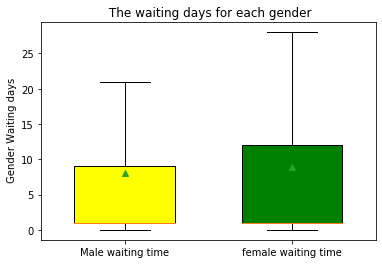

In [60]:
# Display waiting day values for each gender category.

gender_waiting_days = [time_male_waiting[:-1].values, time_female_waiting[:-1].values]

# Boxplot
labels=['Male waiting time','female waiting time']
fig1, ax1 = plt.subplots()
ax1.set_ylabel(' Gender Waiting days')
ax1.set_title(' The waiting days for each gender')
color = ['yellow','green']
box = ax1.boxplot(gender_waiting_days, widths=0.6, patch_artist=True, showmeans=True, showfliers=False, labels=labels);

for patch, color in zip(box['boxes'], color):
    patch.set_facecolor(color)
plt.show()

#The difference in the size of the box explains the interquartile range. The male gender with smaller interquartile range had shorter waiting time.


> The diferent sizes of the box shows the interquartile range. The male gender with smaller interquartile range has shorter waiting time.

> ### <font color='darkblue'> What pattern distribution exists among patients that have shorter average waiting time?</font>


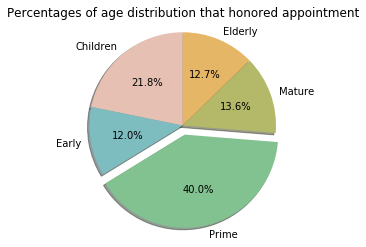

In [61]:
# Pie chart showing the age distribution

labels = ['Children', 'Early', 'Prime', 'Mature', 'Elderly']
sizes = [children, early, prime, mature, elderly]
explode = [0,0,0.1,0,0]
colors=['#E6C0B2','#7EBDBF','#82C290','#B3B968','#E6B667']# using HEX for the color
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentages of age distribution that honored appointment')

plt.show();


> The pie chart shows that Prime age group that consist of patients between ages 25 and 54 inclusive dominates.

> ### <font color='darkblue'>Do patients in scholarship schemes turn to have comparatively shorter waiting time than those not in the scheme?</font>

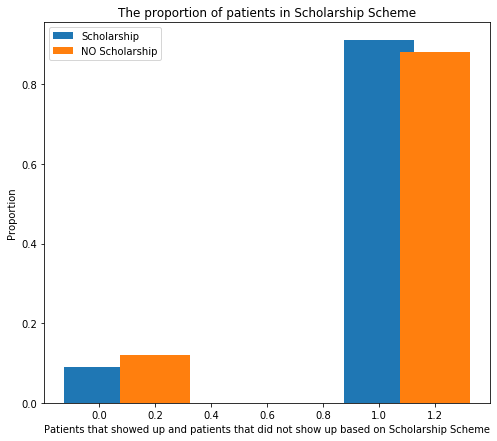

In [62]:
#Bar graph showing distribution of patients that grouped by scholarship
plt.figure(figsize=(8,7))
x = np.arange(2)
width = 0.25
plt.bar(x+0, tab_scholarship['Honor_Appointment'], width=width, label="Scholarship" )
plt.bar(x+0.2, tab_scholarship["Not_Honor_Appointment"], width=width, label="NO Scholarship")
plt.xlabel("Patients that showed up and patients that did not show up based on Scholarship Scheme")
plt.ylabel("Proportion")
plt.title("The proportion of patients in Scholarship Scheme")
plt.legend()
plt.show()


> The bar chart shows that on average more patients in scholarship scheme turn to have longer waiting days as compared with those that are not in scholarship scheme.

> In conclusion, we have seen that Wednesday has the most patients’ traffic and least is on Saturday for medical appointment. In addition, male genders seem to have smaller waiting days among those who honoured their appointments. Furthermore, patients at their prime of 25 to 54 years showed up most and patients in the scholarship schemes seems to have longer waiting days than those not in it.

> ### <font color='darkblue'>References</font>


>   - https://https://seaborn.pydata.org/generated/seaborn.boxplot.html
>   - https://stackoverflow.com/questions/28035839/how-to-delete-a-column-from-a-data-frame-with-pandas
>   - https://pbpython.com/pandas-qcut-cut.html
>   - https://seaborn.pydata.org/tutorial/categorical.html
>   - https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/
>   - https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/
>   - https://docs.python.org/3/library/binary.html
>   - https://stackoverflow.com/questions/18172851/deleting-dataframe-row-in-pandas-based-on-column-value?rq=1

